# Socio-Echonomic data of different countries

The dataset was uploaded from https://www.kaggle.com/santhraul/country-data. 

### PROBLEM STATEMENT:

Help International wants to allocate $10 million of funds that it has managed to raise, to the backward countries that need them the most in order to provide relief to its people during times of disasters and natural calamities. Therefore their challenge is to identify which countries genuinely need those funds, so that the funds can be effectively and strategically utilized.

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Country-data.csv')
data.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
62,Guatemala,35.4,25.80,6.85,36.3,6710,5.140,71.3,3.38,2830
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.900,65.3,3.85,1040
56,Gambia,80.3,23.80,5.69,42.7,1660,4.300,65.5,5.71,562
102,Moldova,17.2,39.20,11.70,78.5,3910,11.100,69.7,1.27,1630
11,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700
84,Lao,78.9,35.40,4.47,49.3,3980,9.200,63.8,3.15,1140
121,Poland,6.0,40.10,7.46,42.1,21800,1.660,76.3,1.41,12600
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738
53,Finland,3.0,38.70,8.95,37.4,39800,0.351,80.0,1.87,46200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Observations

    There are no null values in the dataset
    
    All columns are according to their correct datatypes
    
    Values in the column "country" is only for interpretation and will not be used in building maschine learning model
    
    Numeric values will require scaling
    

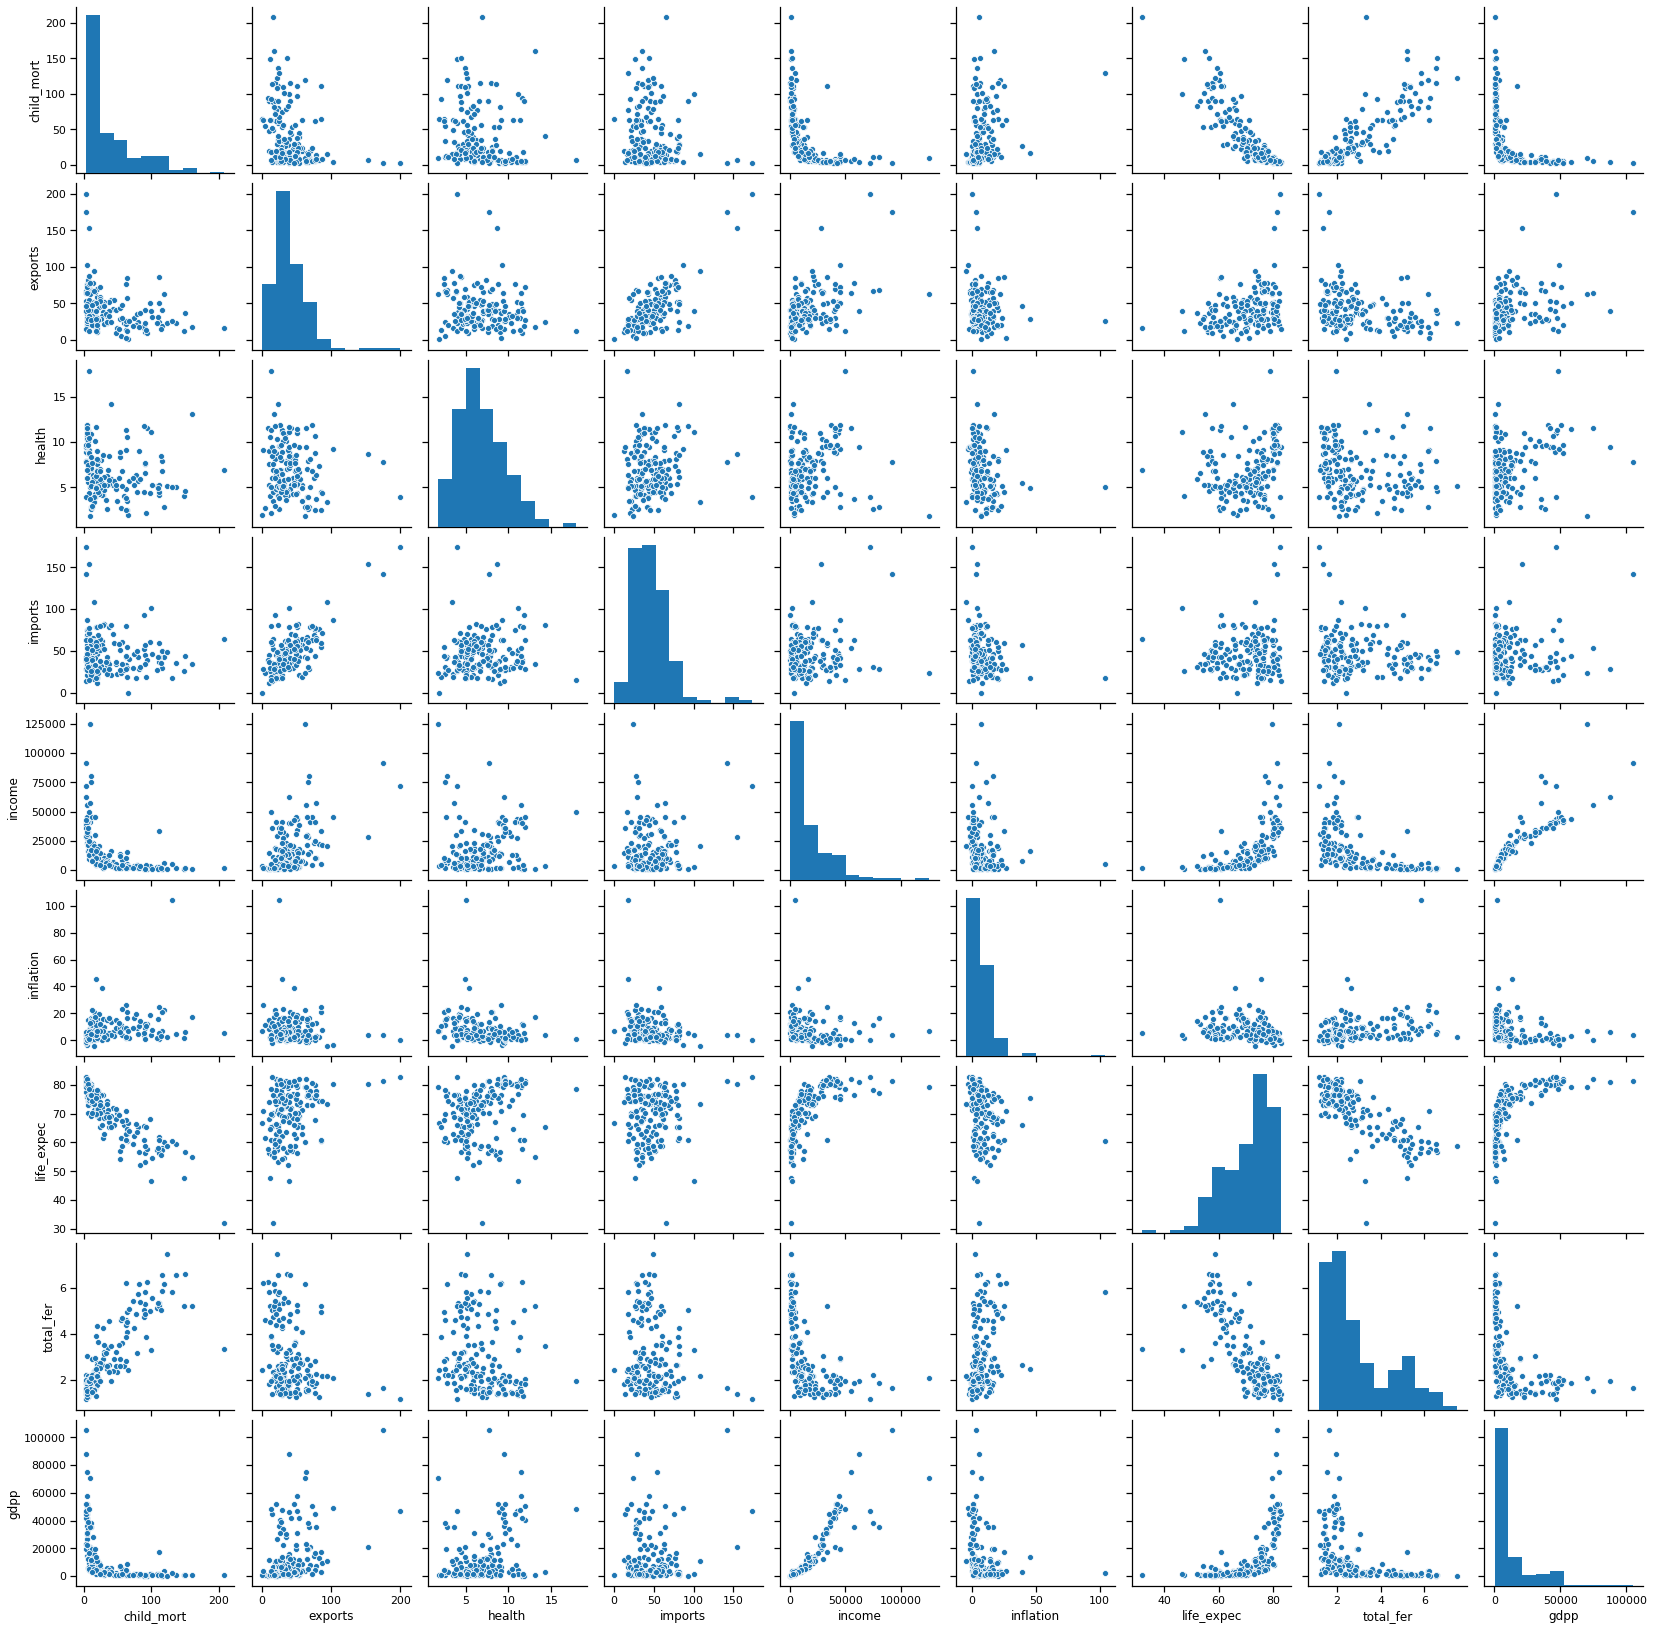

In [5]:
sns.set_context('notebook')
sns.pairplot(data)

In [6]:
data['inflation'] = data['inflation'] +5

In [1]:
log_f = FunctionTransformer(np.log)

estimators = [('log', log_f), ('StandardScaler', StandardScaler())]
pipe = Pipeline(estimators)

# Convert the original data
data_pipe = pd.DataFrame(pipe.fit_transform(data.drop(['country'], axis=1)), columns = data.columns.to_list()[1::])

NameError: name 'FunctionTransformer' is not defined

In [8]:
data_pipe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-1.515754e-16,2.634287e-16,4.364440e-16,7.977650e-18,5.757204e-16,-2.559496e-16,-1.723173e-15,-2.366703e-16,3.383853e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.809110e+00,-7.459472e+00,-2.939059e+00,-9.390595e+00,-2.206478e+00,-4.254414e+00,-5.628619e+00,-1.715309e+00,-2.044268e+00
25%,-8.115091e-01,-4.359711e-01,-5.721137e-01,-4.334014e-01,-8.138497e-01,-7.126295e-01,-4.951252e-01,-7.863465e-01,-8.738276e-01
50%,-7.589583e-02,6.693539e-02,2.061154e-02,9.333909e-02,7.421119e-02,-1.800257e-02,3.205559e-01,-1.716296e-01,-3.535021e-02
75%,9.345347e-01,5.667825e-01,7.497072e-01,5.393911e-01,7.501095e-01,6.659079e-01,6.774915e-01,8.218855e-01,7.020849e-01
max,1.979683e+00,2.339779e+00,2.484844e+00,2.126585e+00,2.138808e+00,3.846716e+00,1.221273e+00,2.194266e+00,2.047517e+00


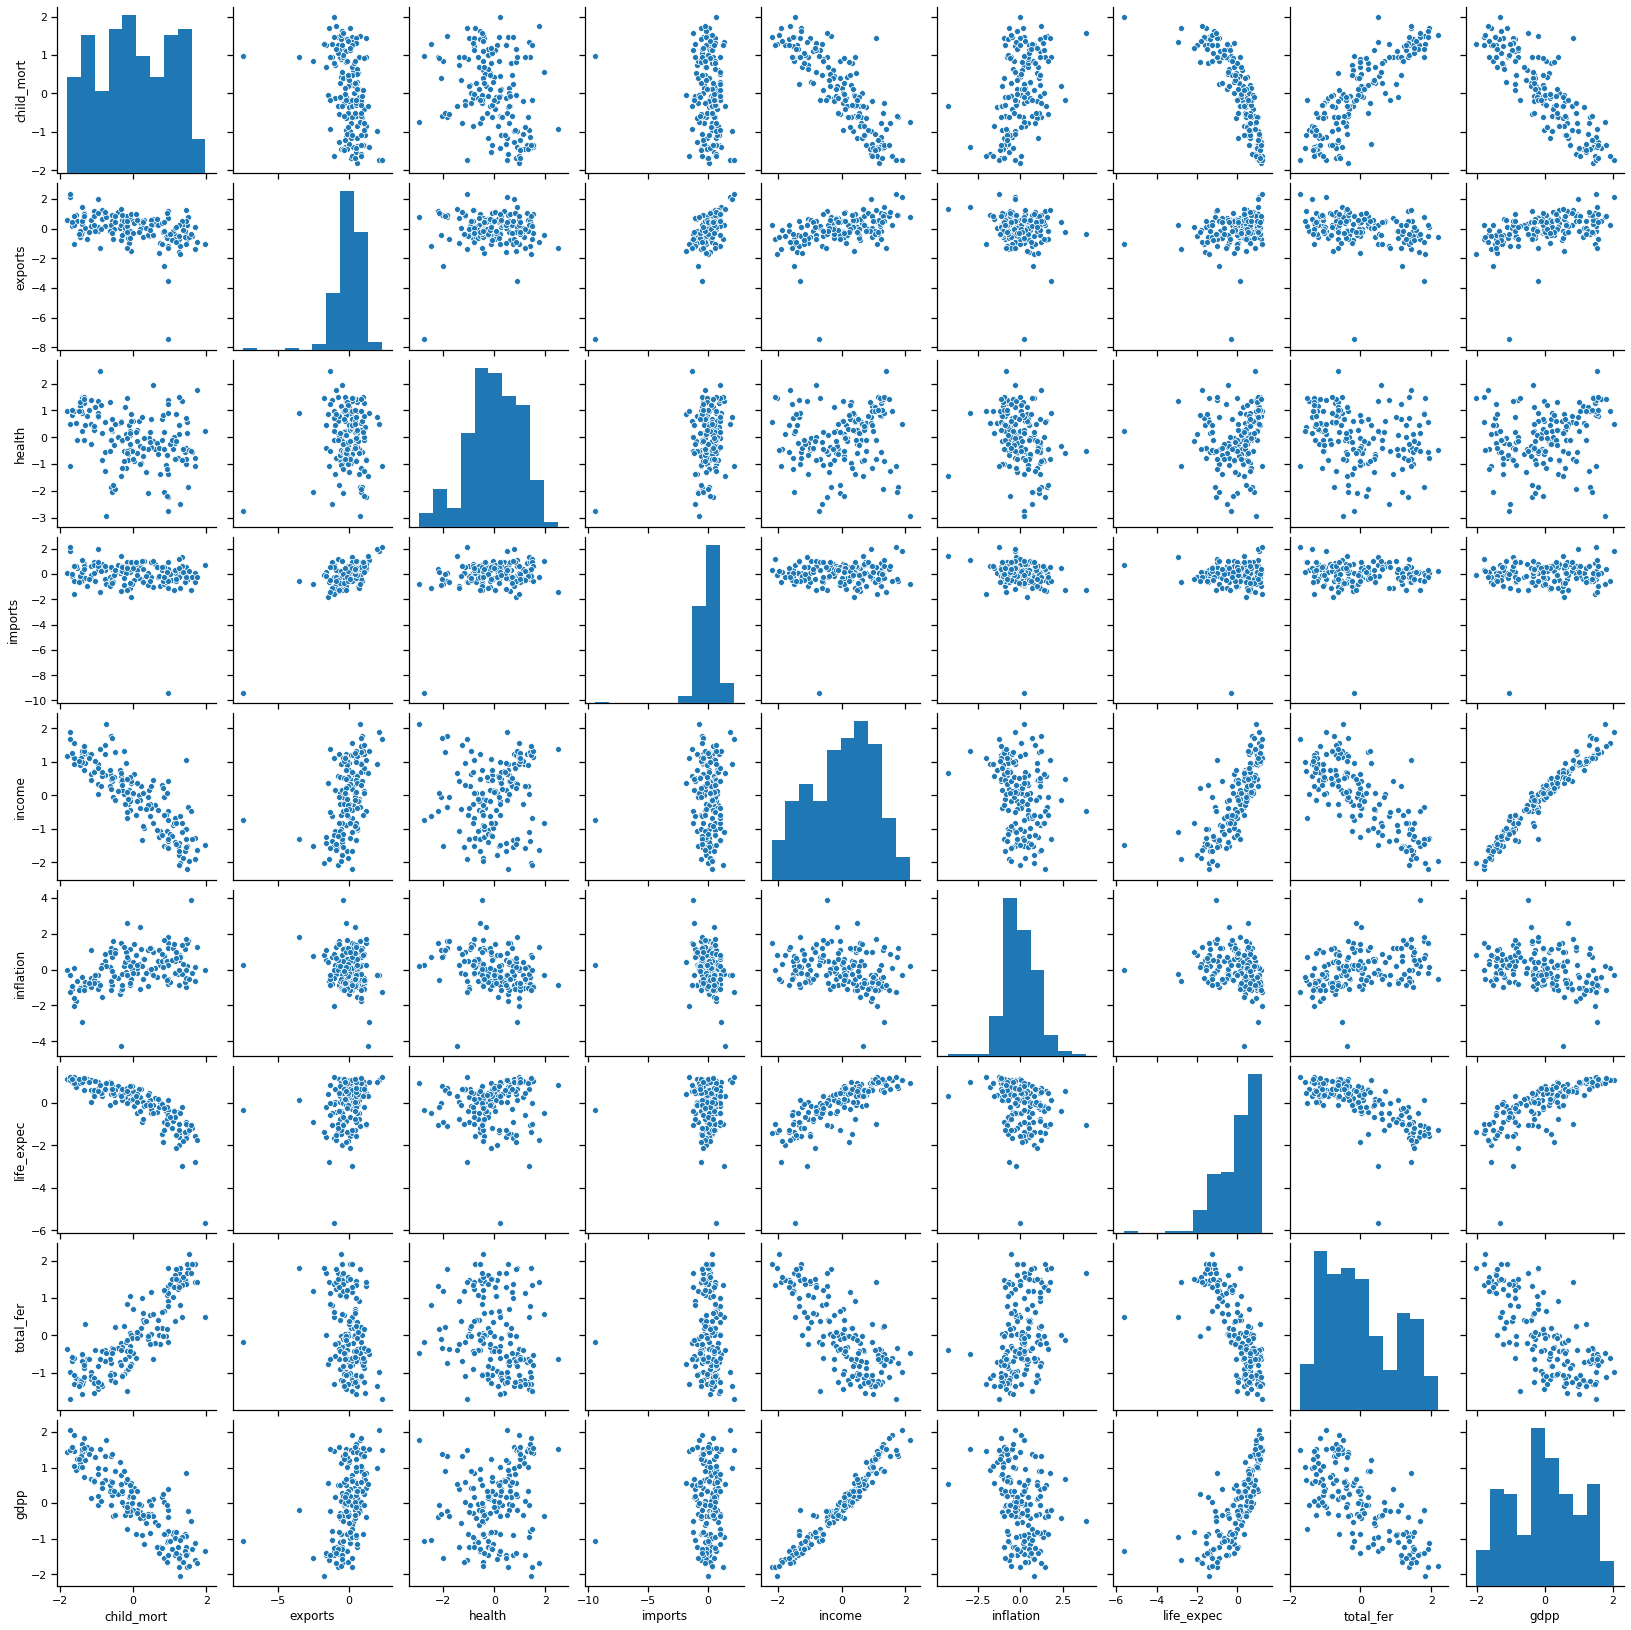

In [9]:
sns.pairplot(data_pipe)

In [10]:
# View the pairwise correlation plots of the new data
corr_mat = data_pipe.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,0.000000,-0.377294,-0.338038,-0.136337,-0.857793,0.450583,-0.841512,0.861246,-0.876190
exports,-0.377294,0.000000,0.021805,0.741665,0.466023,-0.163376,0.276546,-0.316234,0.430254
health,-0.338038,0.021805,0.000000,0.225896,0.112270,-0.319300,0.161241,-0.238296,0.234557
imports,-0.136337,0.741665,0.225896,0.000000,0.032598,-0.239644,0.008868,-0.079023,0.058695
income,-0.857793,0.466023,0.112270,0.032598,0.000000,-0.268789,0.769880,-0.769648,0.972035
inflation,0.450583,-0.163376,-0.319300,-0.239644,-0.268789,0.000000,-0.299045,0.395787,-0.344774
life_expec,-0.841512,0.276546,0.161241,0.008868,0.769880,-0.299045,0.000000,-0.729696,0.755764
total_fer,0.861246,-0.316234,-0.238296,-0.079023,-0.769648,0.395787,-0.729696,0.000000,-0.735839
gdpp,-0.876190,0.430254,0.234557,0.058695,0.972035,-0.344774,0.755764,-0.735839,0.000000


In [11]:
# Have a look at two categories with their respective most strongly correlated variable
corr_mat.abs().idxmax()

child_mort          gdpp
exports          imports
health        child_mort
imports          exports
income              gdpp
inflation     child_mort
life_expec    child_mort
total_fer     child_mort
gdpp              income
dtype: object

In [12]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 9):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_pipe)
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    #print(n,np.abs(PCAmod.components_).sum(axis=0), PCAmod.explained_variance_ratio_.sum())
    pca_params = (abs_feature_values/abs_feature_values.sum()).tolist()
    pca_params.append(n)
    pca_params.append(PCAmod.explained_variance_ratio_.sum())
    pca_list.append(pca_params)
    
pca_params = pd.DataFrame(pca_list)
    # Store the model and variance
#    pca_list.append(pd.Series({'n':n,
 #                              'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
    # Calculate and store feature importances
 #   abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
 #   feature_weight_list.append(pd.DataFrame({'n':n, 
  #                                           'features': data_pipe.columns,
   #                                          'values':abs_feature_values/abs_feature_values.sum()})

In [13]:
pca_params.drop([9], axis=1, inplace=True)


In [14]:
columns = data_pipe.columns.to_list()
columns.append('value')
k=0
for name in columns:
    if k>8:
        break
    
    pca_params.rename(columns={k: name}, inplace=True)
    k+=1

In [15]:
pca_params.rename(columns={10: 'variance'}, inplace=True)

In [16]:
k=0
for i in range(8,0,-1):
    dex=7-k
    pca_params.rename(index={dex: i}, inplace=True)
    k+=1
pca_params

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,variance
1,0.157842,0.085310,0.052698,0.037755,0.151074,0.080225,0.139330,0.143308,0.152458,0.530054
2,0.103794,0.156761,0.060882,0.167076,0.110701,0.075783,0.115510,0.102592,0.106901,0.709093
3,0.081672,0.164024,0.142408,0.122688,0.108880,0.124198,0.090682,0.076469,0.088978,0.838039
4,0.070022,0.136510,0.183373,0.103038,0.095213,0.187511,0.075269,0.066889,0.082174,0.911624
5,0.066379,0.118566,0.150832,0.101257,0.105991,0.160077,0.100141,0.091095,0.105663,0.949764
6,0.058139,0.105456,0.133106,0.092991,0.096407,0.145527,0.138654,0.133315,0.096405,0.978892
7,0.067199,0.128861,0.125207,0.113776,0.086608,0.129536,0.129899,0.120420,0.098493,0.991490
8,0.104332,0.124640,0.112567,0.111886,0.090301,0.115373,0.126182,0.119084,0.095635,0.998575


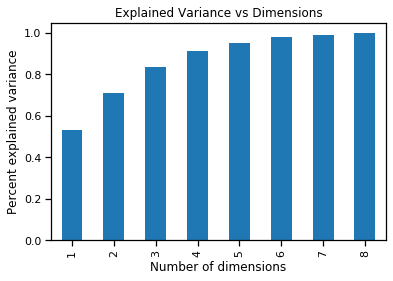

In [17]:
ax = pca_params['variance'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [18]:
pca_params.rename(index={1: 2}, inplace=True)

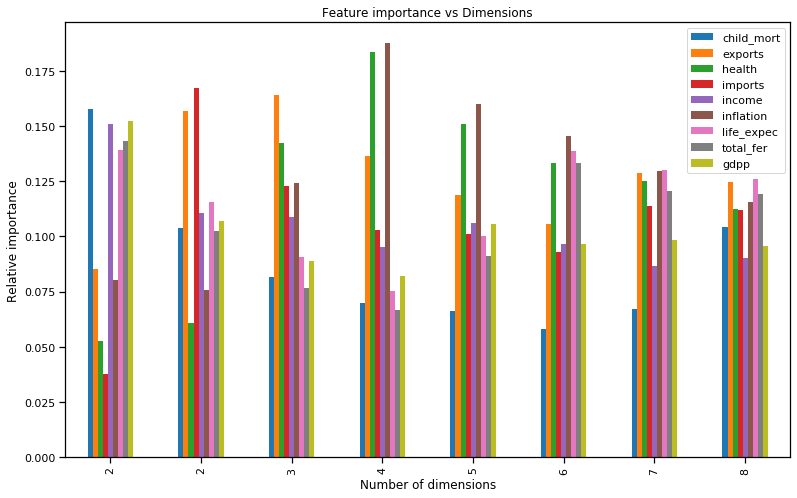

In [19]:
ax = pca_params[data_pipe.columns.to_list()].plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [20]:
# The number of dimensions can be shrunk to 5 with retaining ~95% explained variance
PCAmod = PCA(n_components=5)
data_pca = pd.DataFrame(PCAmod.fit_transform(data_pipe))

In [21]:
data_pca

,0,1,2,3,4
0,3.454795,-0.209938,-1.099316,-0.404099,0.138296
1,-0.724634,0.138861,-0.234399,0.096472,-0.875220
2,0.229376,0.628295,1.460002,-0.324374,-0.309764
3,2.461992,-0.592158,2.441331,-0.085737,0.939433
4,-1.540536,-0.351213,0.024479,0.535967,-0.025921
...,...,...,...,...,...
162,0.987625,-0.954257,-0.038403,0.724814,0.196901
163,0.010498,1.806334,1.814913,-1.723529,-0.094550
164,0.091231,-1.254281,0.480934,-0.679145,-1.301914
165,2.065601,0.139928,0.960479,-0.894617,-0.164733


## KMeans

,0
0,923.470441
1,761.179943
2,618.892945
3,556.757049
4,507.535692
5,466.607323
6,435.364022


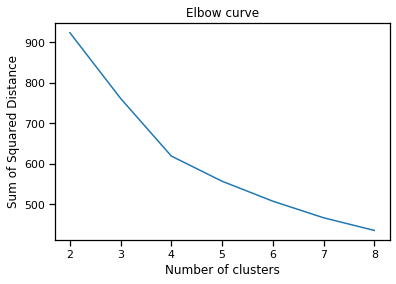

In [22]:
# Identifying the right number of clusters using elbow-curve/Sum of Squared Distance (SSD)
# For the data with original dimentionality
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pipe)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
display(pd.DataFrame(ssd))
plt.plot(range_n_clusters, ssd)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distance")
plt.show()

,0
0,848.223737
1,686.685048
2,545.504081
3,483.448656
4,436.703230
5,395.350159
6,367.590626


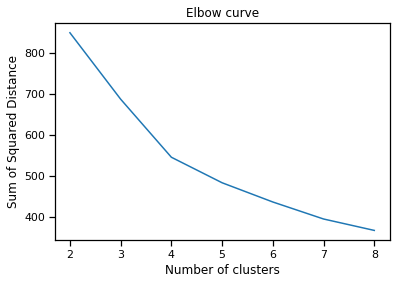

In [23]:
# Identifying the right number of clusters using elbow-curve/Sum of Squared Distance (SSD)
# For the data with reduced dimentionality
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
display(pd.DataFrame(ssd))
plt.plot(range_n_clusters, ssd)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distance")
plt.show()

In [24]:
# Model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=0)
kmeans.fit(data_pca)
data_kmeans_4 = data.copy()
data_kmeans_4['cluster_id'] = kmeans.labels_
data_kmeans_4.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,14.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,9.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,21.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,27.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,6.440,76.8,2.13,12200,3
5,Argentina,14.5,18.9,8.10,16.0,18700,25.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,12.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,6.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,5.873,80.5,1.44,46900,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,18.800,69.1,1.92,5840,1


In [25]:
data_kmeans_4['cluster_id'].value_counts()

1    69
3    52
2    45
0     1
Name: cluster_id, dtype: int64

In [26]:
# Since one cluster contains only one value, the number of clusters was decreased to 3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
kmeans.fit(data_pca)
data_kmeans_3 = data.copy()
data_kmeans_3['cluster_id'] = kmeans.labels_
data_kmeans_3.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,14.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,9.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,21.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,27.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,6.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,25.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,12.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,6.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,5.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,18.800,69.1,1.92,5840,0


In [27]:
data_kmeans_3['cluster_id'].value_counts()

0    67
2    52
1    48
Name: cluster_id, dtype: int64

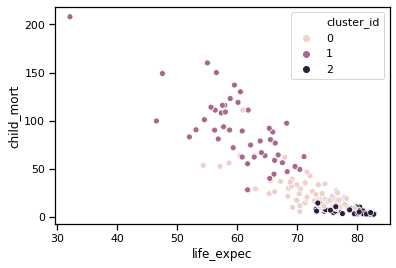

In [28]:
# Let's look at one of the correlation plots closely to understand how values were arranged into clusters
sns.scatterplot(data=data_kmeans_3, y="child_mort", x="life_expec", hue="cluster_id")

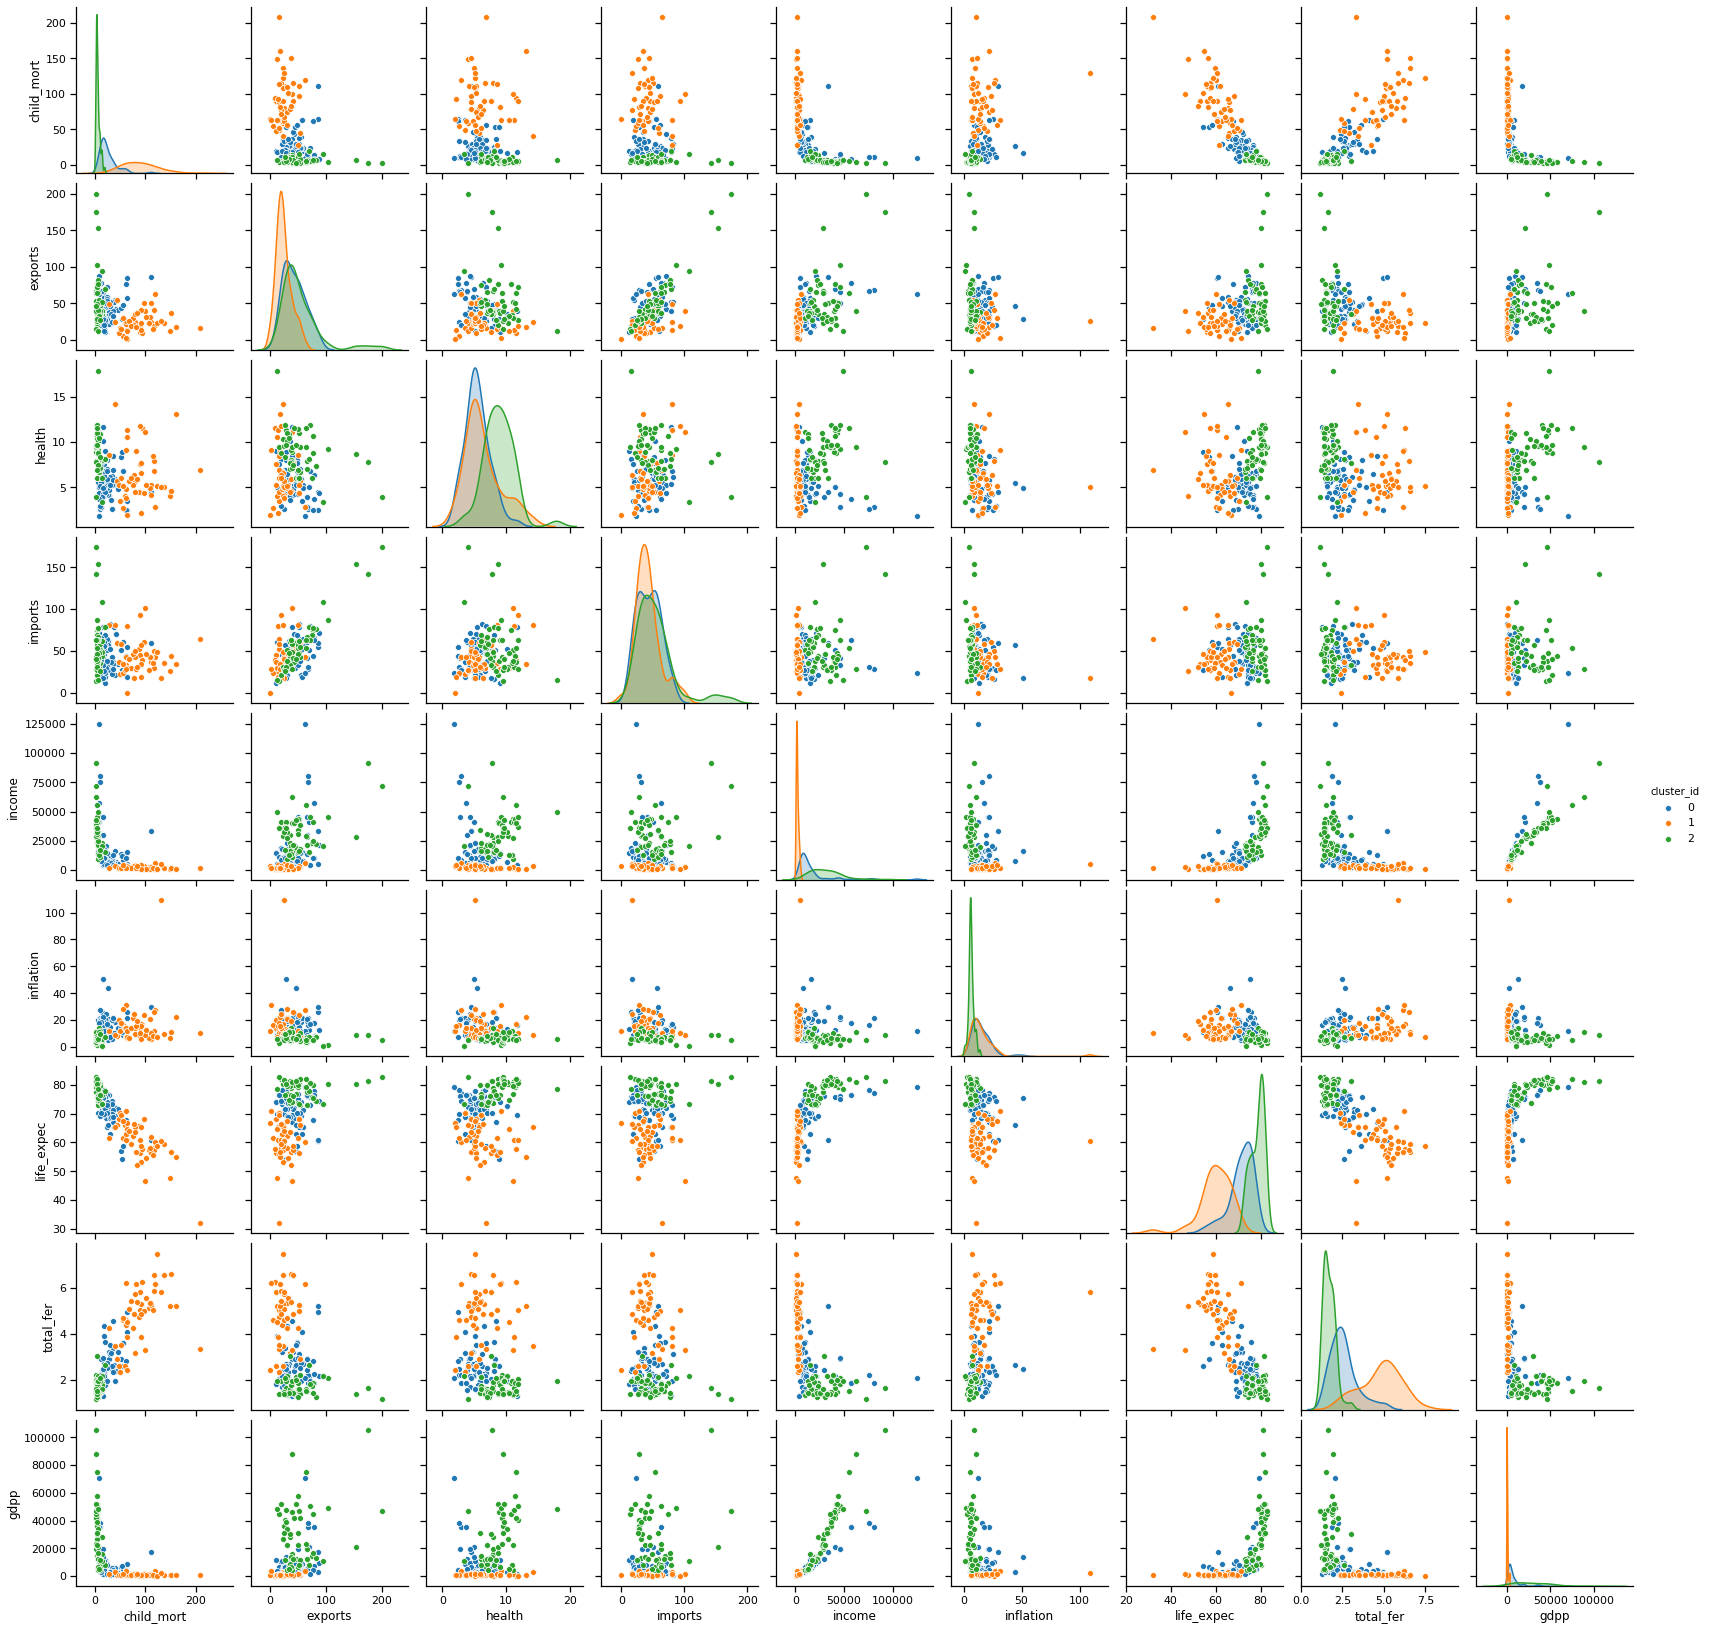

In [29]:
# All correlations
sns.set_context('notebook')
sns.pairplot(data_kmeans_3, hue='cluster_id')

In [31]:
pd.pivot_table(data_kmeans_3, index=['cluster_id'],
                    values=data_kmeans_3.columns.to_list()[:-1], aggfunc=np.median).sort_values(['life_expec'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
1,88.75,22.4,758,5.48,39.75,1860,12.39,60.75,5.035
0,19.80,41.2,4660,5.20,44.50,9940,12.77,72.80,2.470
2,5.00,41.2,25150,8.87,47.85,28700,6.19,79.85,1.620


##  MeanShift

In [32]:
ms = MeanShift()
clusters = ms.fit_predict(data_pca)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
# This model was not successful in clustering the data
data_MeanShift = data.copy()
data_MeanShift['cluster_id'] = clusters
data_MeanShift[data_MeanShift['cluster_id']>0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
73,Ireland,4.2,103.000,9.19,86.5000,45700,1.780,80.4,2.05,48700,2
107,Myanmar,64.4,0.109,1.97,0.0659,3720,12.040,66.8,2.41,988,1
131,Seychelles,14.4,93.800,3.40,108.0000,20400,0.790,73.4,2.17,10800,2
133,Singapore,2.8,200.000,3.96,174.0000,72100,4.954,82.7,1.15,46600,2


## AgglomerativeClustering

In [34]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = ac.fit_predict(data_pca)
clusters

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
data_AC = data.copy()
data_AC['cluster_id'] = clusters
data_AC['cluster_id'].value_counts()

0    121
1     46
Name: cluster_id, dtype: int64

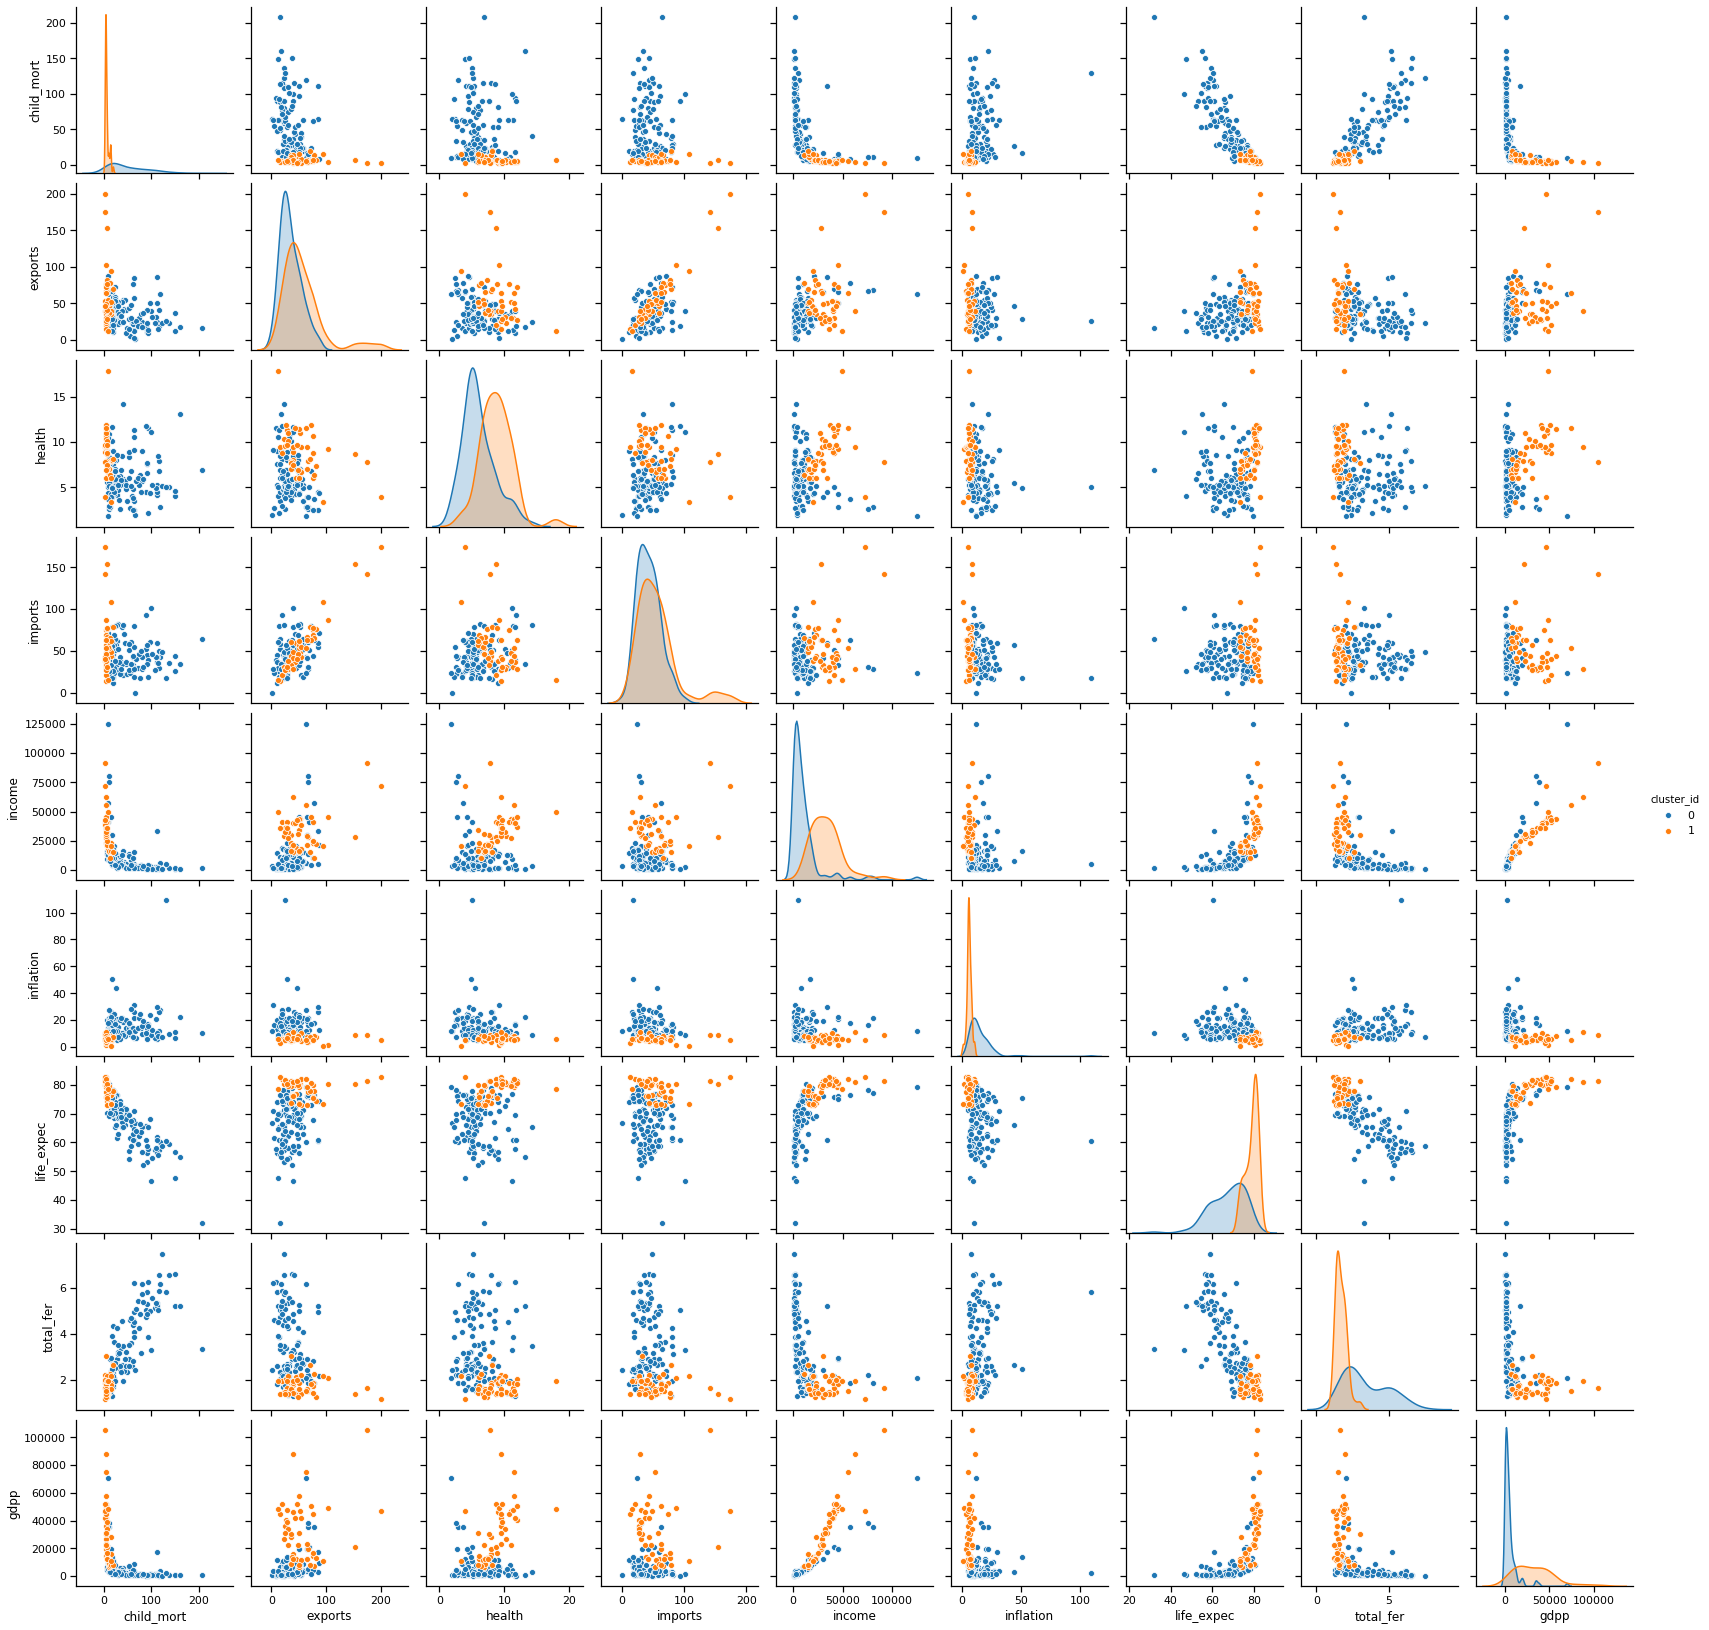

In [36]:
sns.set_context('notebook')
sns.pairplot(data_AC, hue='cluster_id')

In [37]:
pd.pivot_table(data_AC, index=['cluster_id'],
                    values=data_AC.columns.to_list()[:-1], aggfunc=np.median).sort_values(['life_expec'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,35.4,30.3,2970,5.44,42.70,6420,12.44,69.0,2.88
1,4.5,49.8,30650,8.76,48.25,31350,6.08,80.0,1.62


In [38]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = ac.fit_predict(data_pca)
clusters

array([0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0,
       0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [39]:
data_AC_3 = data.copy()
data_AC_3['cluster_id'] = clusters
data_AC_3['cluster_id'].value_counts()

2    84
1    46
0    37
Name: cluster_id, dtype: int64

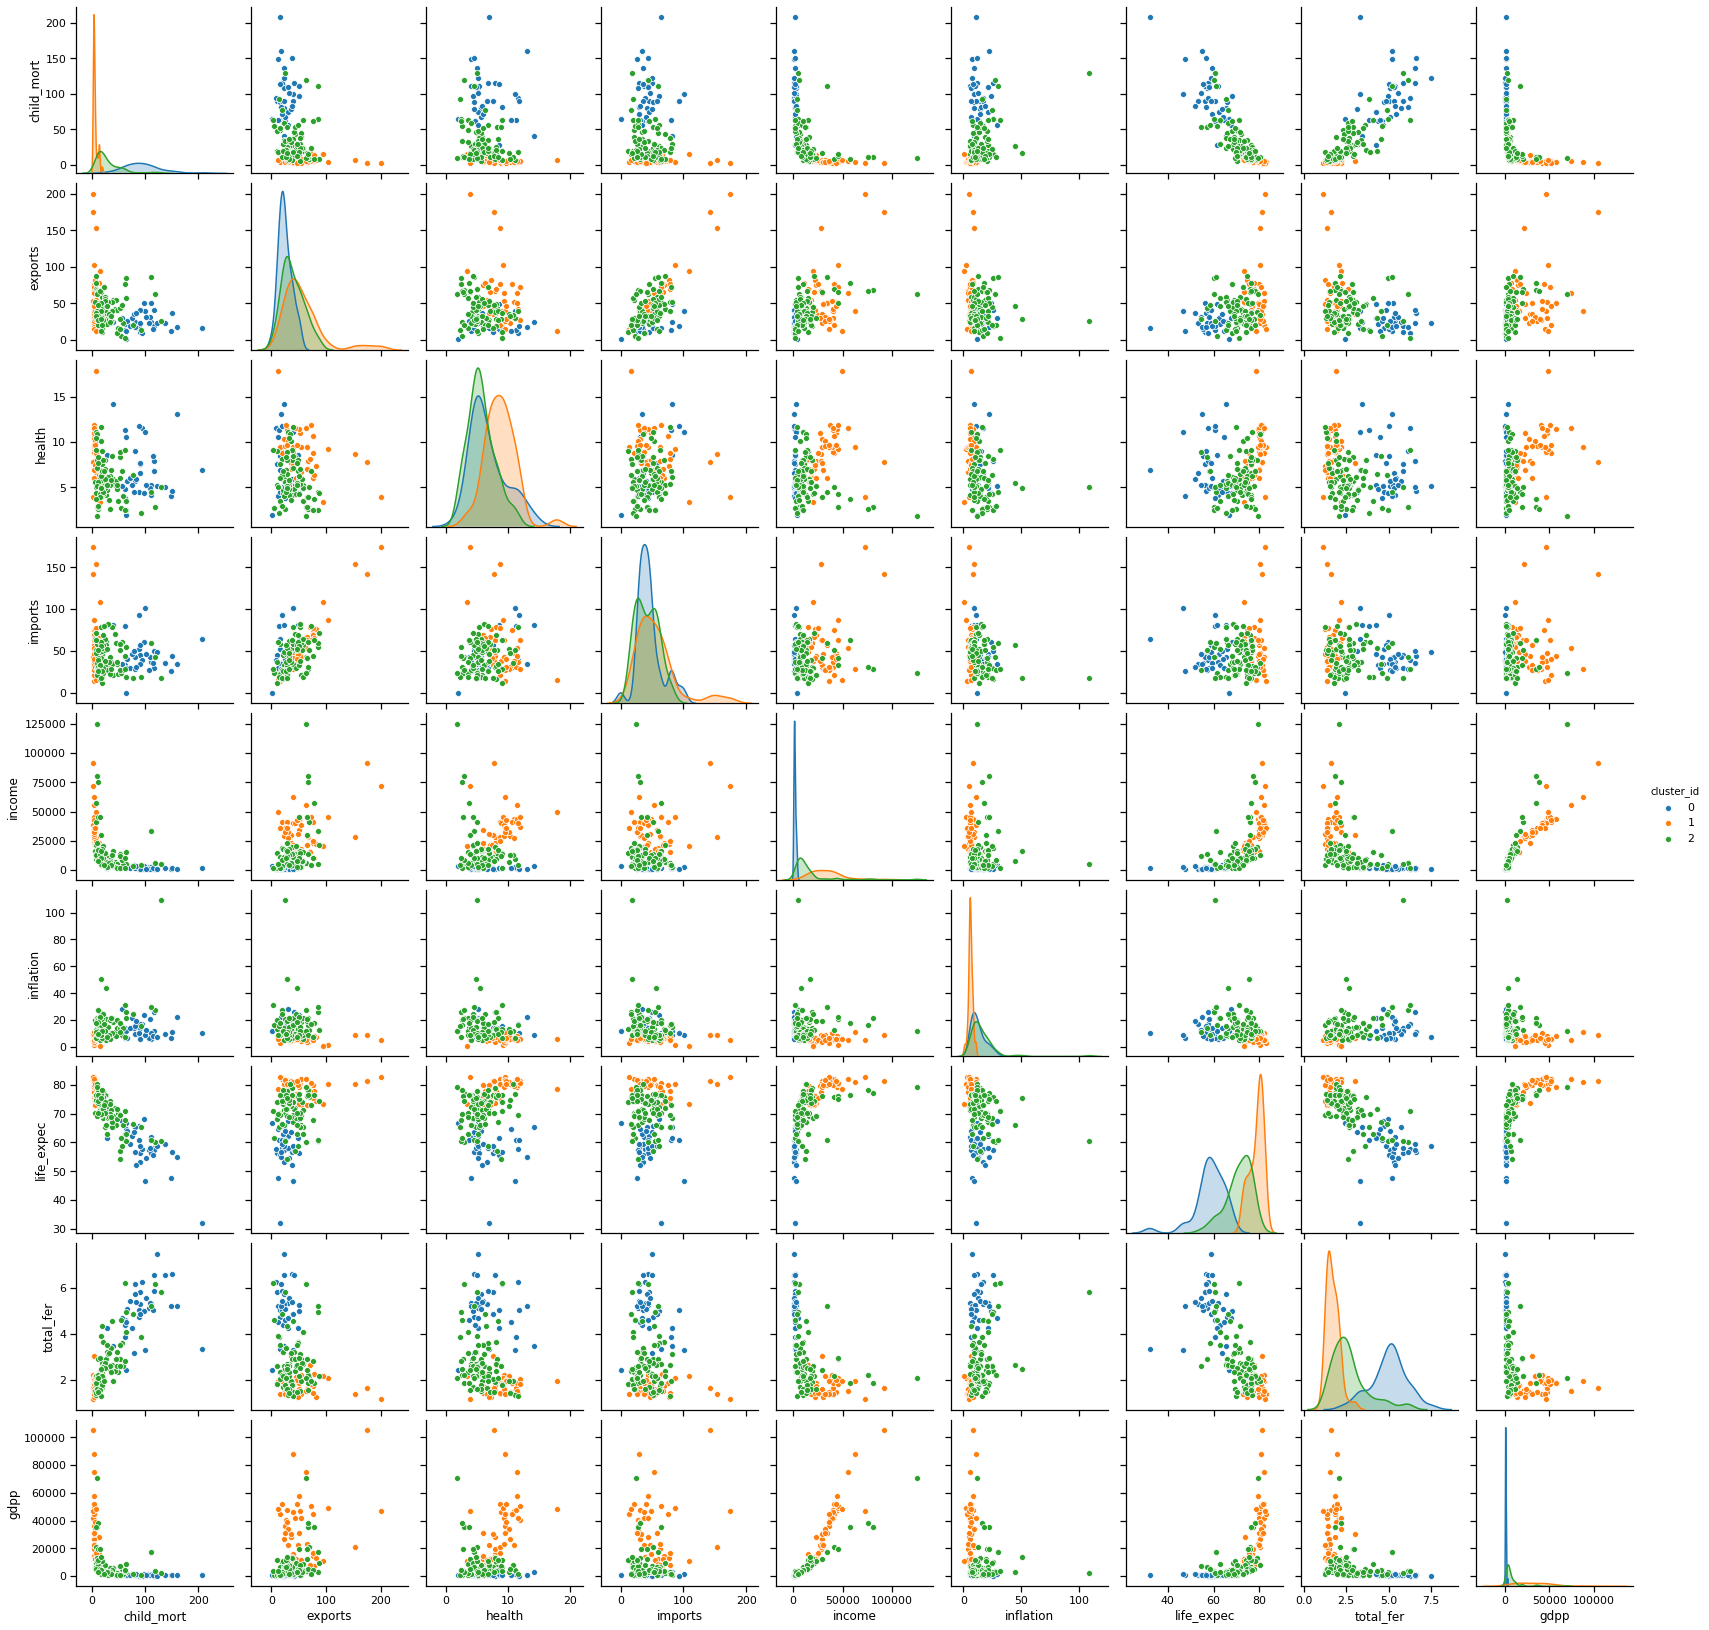

In [40]:
sns.set_context('notebook')
sns.pairplot(data_AC_3, hue='cluster_id')

In [41]:
pd.pivot_table(data_AC_3, index=['cluster_id'],
                    values=data_AC_3.columns.to_list()[:-1], aggfunc=np.median).sort_values(['life_expec'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,90.3,22.8,702,5.690,43.00,1660,11.39,58.80,5.11
2,20.9,34.9,4480,5.315,41.65,9790,13.42,71.85,2.50
1,4.5,49.8,30650,8.760,48.25,31350,6.08,80.00,1.62


## GaussianMixture

In [45]:
gm = GaussianMixture(n_components=2)
clusters = gm.fit_predict(data_pca)
clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [46]:
data_gm_2 = data.copy()
data_gm_2['cluster_id'] = clusters
data_gm_2['cluster_id'].value_counts()

1    102
0     65
Name: cluster_id, dtype: int64

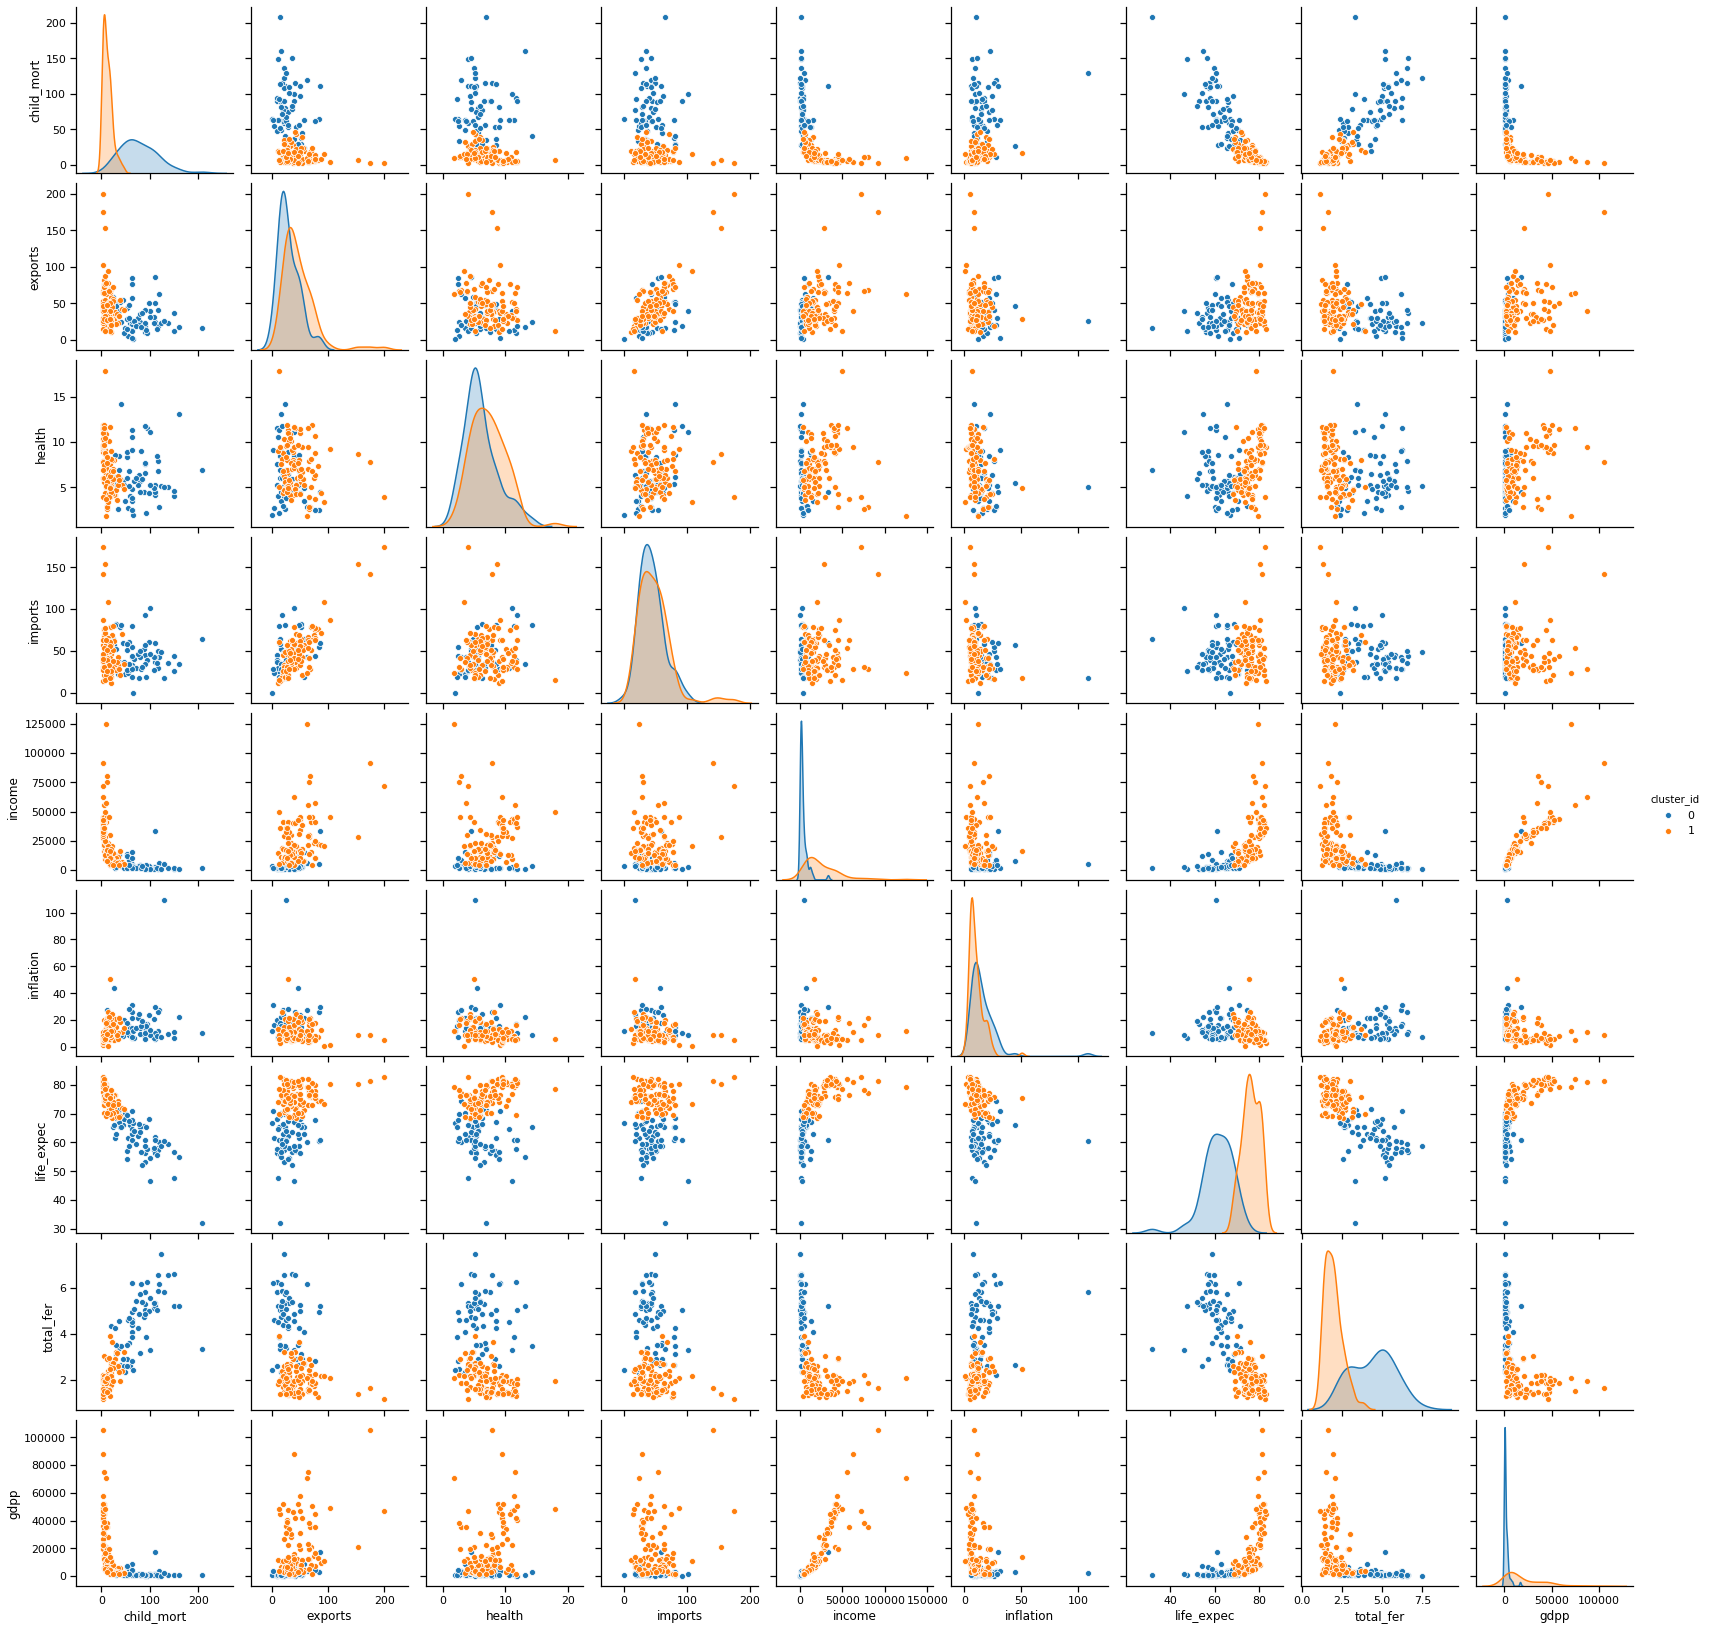

In [47]:
sns.set_context('notebook')
sns.pairplot(data_gm_2, hue='cluster_id')

In [48]:
pd.pivot_table(data_gm_2, index=['cluster_id'],
                    values=data_gm_2.columns.to_list()[:-1], aggfunc=np.median).sort_values(['life_expec'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,71.90,24.90,1040,5.38,42.9,2480,12.64,61.70,4.61
1,10.45,39.75,11250,7.02,44.5,18900,8.65,76.35,1.92


In [49]:
gm = GaussianMixture(n_components=3)
clusters = gm.fit_predict(data_pca)
clusters

array([1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
data_gm_3 = data.copy()
data_gm_3['cluster_id'] = clusters
data_gm_3['cluster_id'].value_counts()

1    91
2    71
0     5
Name: cluster_id, dtype: int64

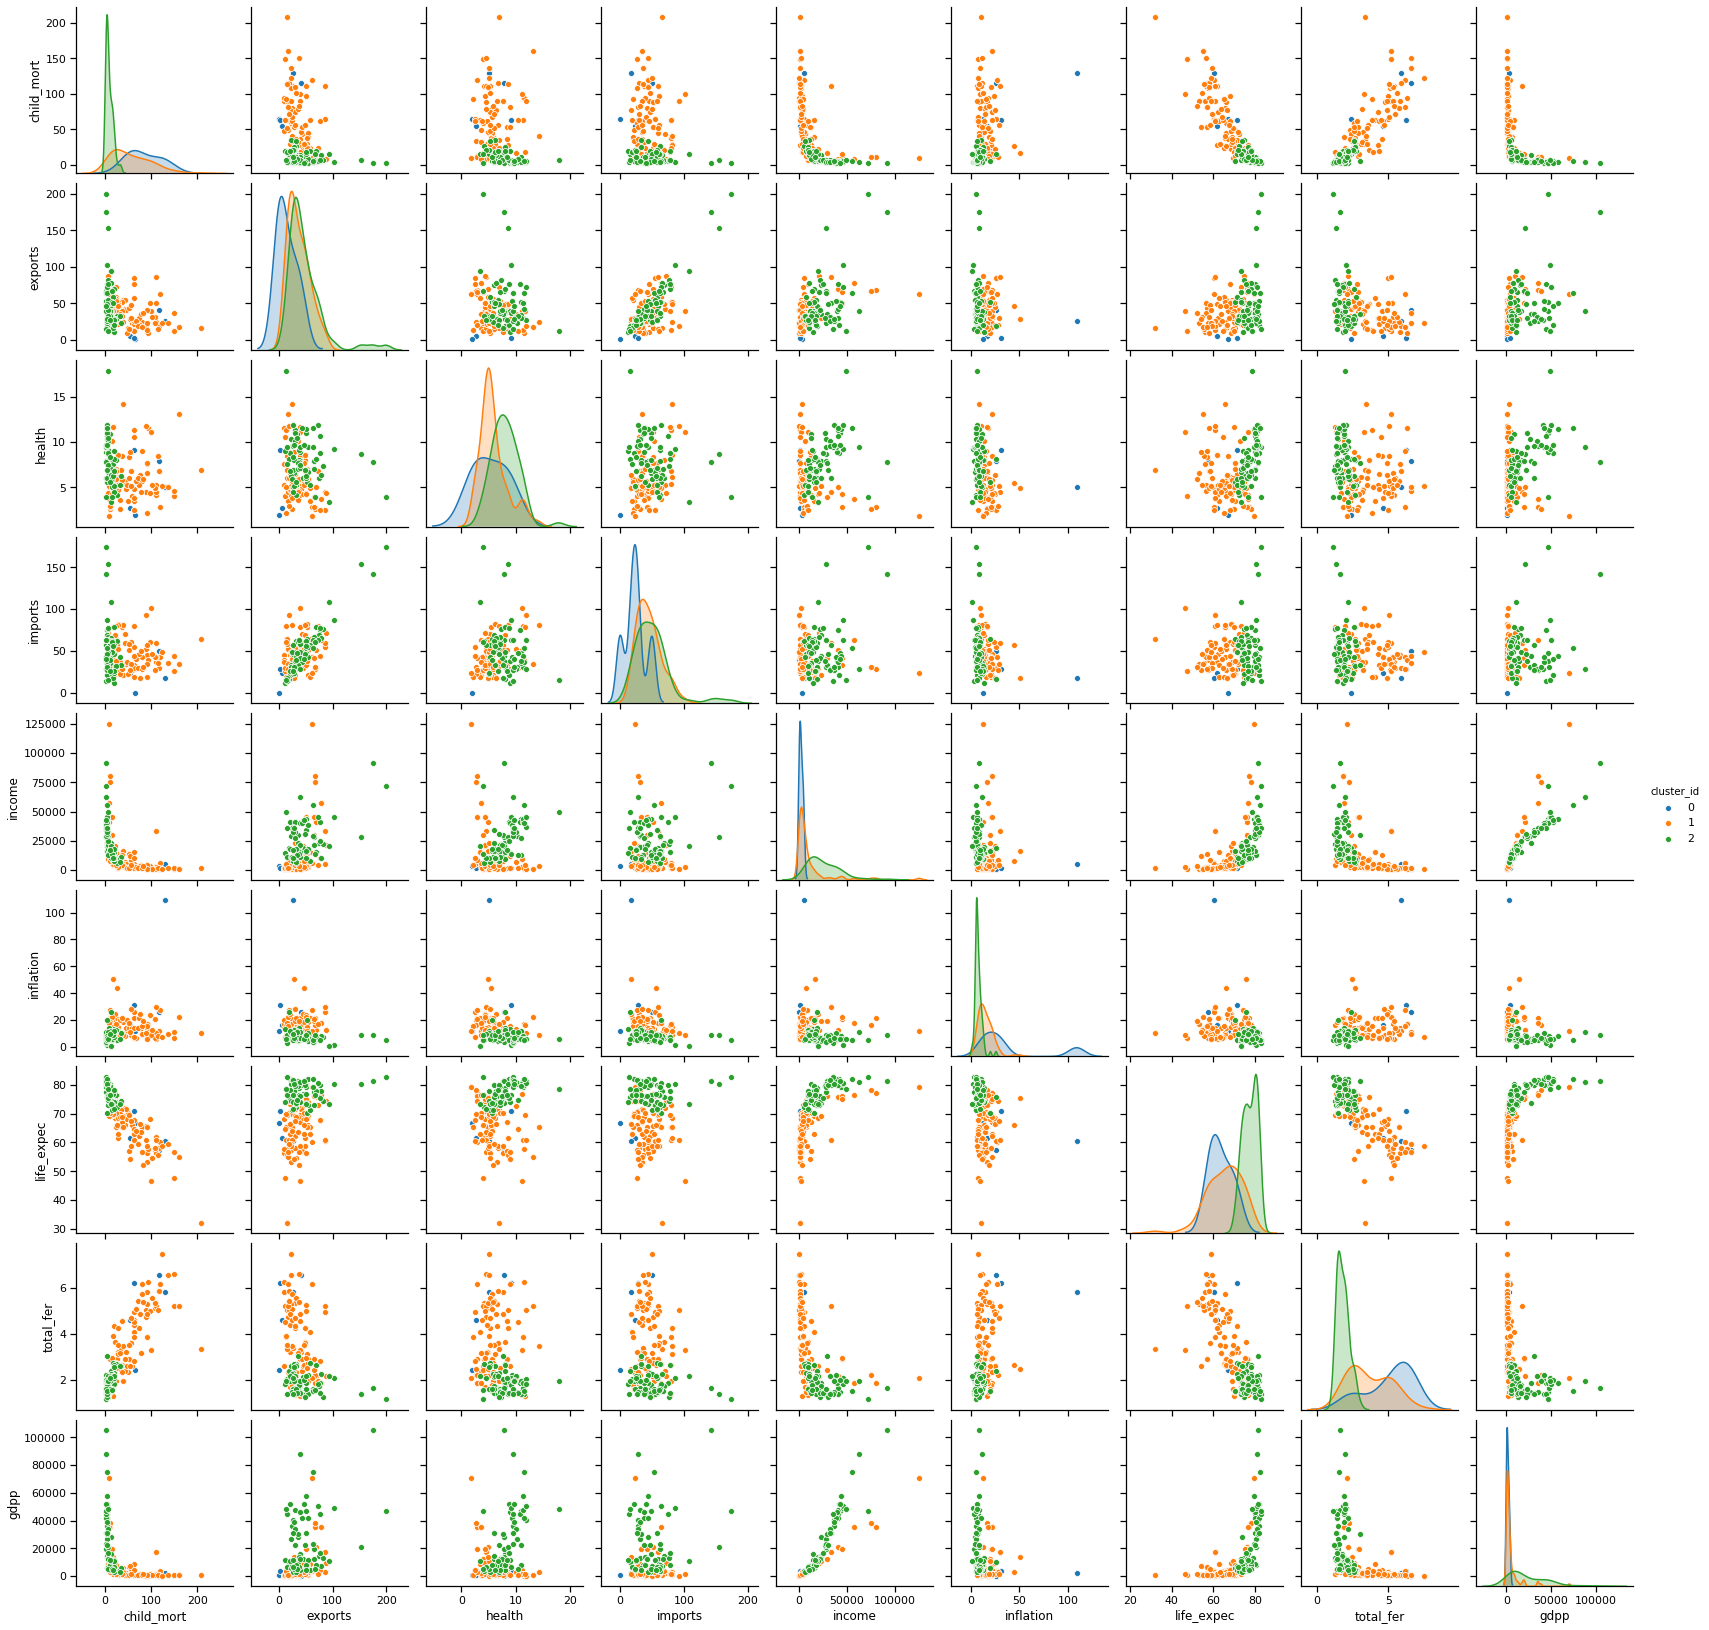

In [51]:
sns.set_context('notebook')
sns.pairplot(data_gm_3, hue='cluster_id')

## Conclusions
By this study, we performed the primary division of the countries into 2 or 3 clusters. The most successful models for this task are KMeans (3 clusters), Agglomerative clustering (2 or 3 clusters), and Gaussian Mixture (2 clusters). 
The countries that would needed funding have a high child mortality rate, low dbpp, low income, low life expectancy, low levels of import and export. There is a clear correlation among these parameters. 
The countries that were chosen during primary division can be studied further separately to find those that would be in need of financial help more. This will depend on the amount of funding is required for a particular country and circumstances.